# Laboratorio 1(Machine Learning)

Dataset.- ([House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction "Dataset")) Mediante las caracteristicas de una casa, se puede llegar a predecir el precio estimado de una casa.


## 1. regresion lineal multivariable
Se implementa la regresion lineal multivariable para predecir el precio de las casas en USA. El archivo `kc_house_data.csv` contiene un conjunto de entrenamiento de precios de casas en en el condado mde King, Estado Unidos.
a continuacion se especifica cada columna del dataset.-



In [21]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline


### 1.1 Cargamos los datos del dataset


In [33]:
# Cargamos los datos utilizando pandasd
data = pd.read_csv('song_data.csv', delimiter=',')

#retiramos el id y la fecha del las columnas, quitamos el precio ya que ira a el vector Y, tambien quitamos los titulos
dataset = data.drop(['song_name','key','audio_mode','speechiness','tempo','time_signature','audio_valence'], axis=1).astype(float)

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

X_test = test_dataset.drop(['song_popularity'], axis=1).values
y_test = test_dataset['song_popularity'].values

# Seleccionamos las columnas para X y la columna 'price' para y
X = train_dataset.drop(['song_popularity'], axis=1).values
y = train_dataset['song_popularity'].values
m = len(y)
# Ahora, X y y deberían contener datos numéricos del 80% del dataset

# imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'Y'
))
print('-' * 100)

for i in range(10):
    print('{:8.0f}{:8.5f}{:10.5f}{:10.5f}{:8.5f}{:8.5f}'.format(
        X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], y[i]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6]
----------------------------------------------------------------------------------------------------
  194728 0.58300   0.33100   0.26300 0.03480 0.18300
  269146 0.01960   0.81900   0.75900 0.00001 0.06130
  204013 0.05490   0.56400   0.71400 0.00000 0.15500
   84371 0.92200   0.66700   0.20900 0.93200 0.12400
  241560 0.00017   0.34100   0.91200 0.00000 0.21600
  196664 0.01110   0.45200   0.79400 0.00182 0.41600
  284466 0.09330   0.89100   0.31900 0.00010 0.04820
  224680 0.00271   0.85900   0.68500 0.00000 0.06870
  189884 0.19300   0.87300   0.46500 0.90600 0.09910
  175851 0.22200   0.58700   0.66800 0.00000 0.05890


<a id="section4"></a>
### 1.2 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. En este caso
### Hacemos el uso de la siguiente funcion para normalizar los datos

In [30]:
def  featureNormalize(X):
    X_norm = X.copy()
    
    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[0])
    sigma = np.zeros(X.shape[0])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    
    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma


Normalizamos los datos

In [38]:
# llama featureNormalize con los datos cargados

X_norm, mu, sigma = featureNormalize(X)

print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}'.format(
    'X_norm[:,0]', '  X_norm[:, 1]', '  X_norm[:, 2]', '  X_norm[:, 3]', '  X_norm[:, 4]', '  X_norm[:, 5]', '  X_norm[:, 6]'
))
print('-' * 172)

for i in range(10):
    print('{:8.4f}{:17.4f}{:13.4f}{:14.4f}{:15.4f}{:14.4f}{:14.4f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6]
    ))

print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)


X_norm[:,0]  X_norm[:, 1]  X_norm[:, 2]  X_norm[:, 3]  X_norm[:, 4]  X_norm[:, 5]  X_norm[:, 6]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 -0.3972           1.1305      -1.9342       -1.7864        -0.1933        0.0218       -1.7170
  0.8444          -0.8280       1.1857        0.5322        -0.3513       -0.8184        0.8746
 -0.2423          -0.7053      -0.4445        0.3218        -0.3513       -0.1715        0.6457
 -2.2384           2.3089       0.2140       -2.0389         3.8794       -0.3855       -1.5585
  0.3842          -0.8956      -1.8703        1.2474        -0.3513        0.2496        0.5202
 -0.3649          -0.8576      -1.1606        0.6958        -0.3430        1.6304        0.6026
  1.1000          -0.5718       1.6461       -1.5247        -0.3508       -0.9088       -2.2715
  0.1026          -0.8868       1.4415        0.1863       

### 1.3 Graficar las caracteristicas
 graficamos cada caracteristica respecto a Y, esto para ver la relacion entre estos.

In [39]:
# Creamos una funcion que nos ayude con las graficas de cada dato respecto a la Y predicha
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  # pyplot.plot((x, y), '-')
  
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

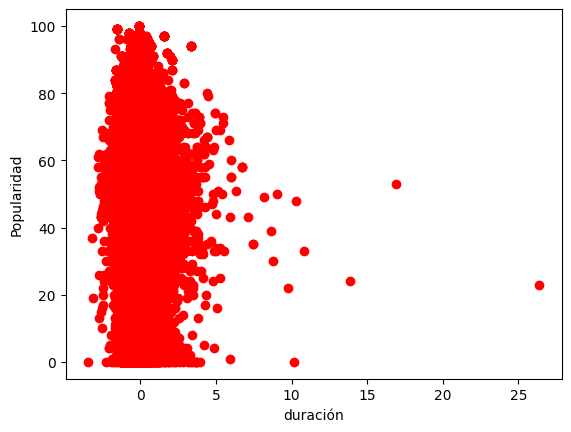

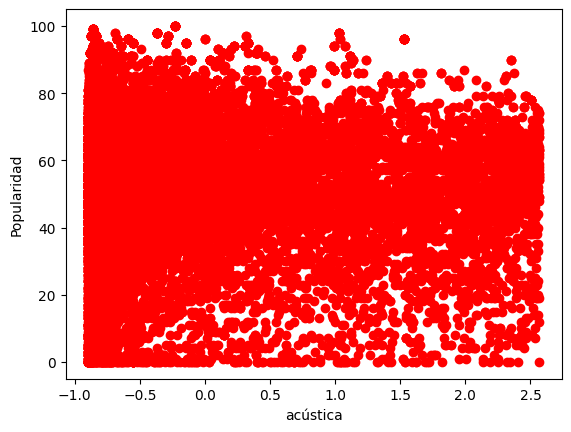

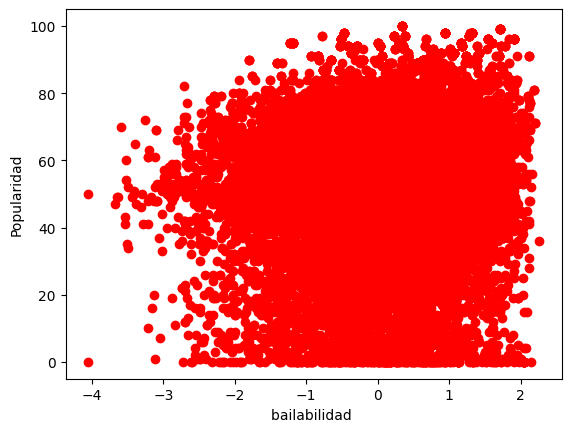

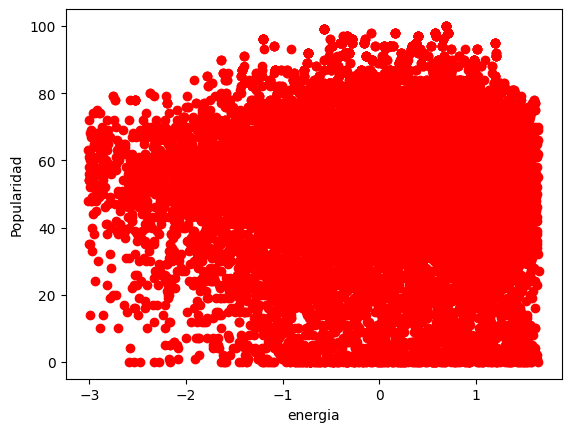

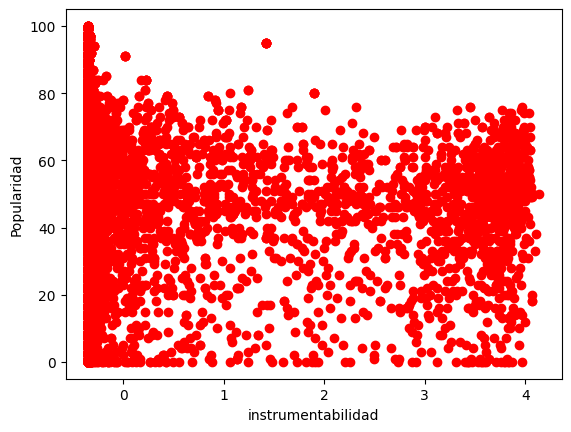

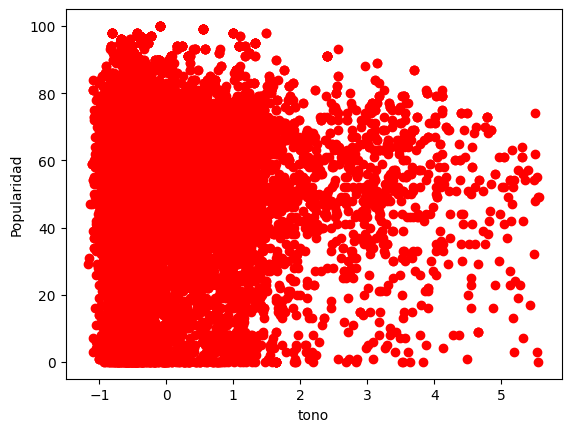

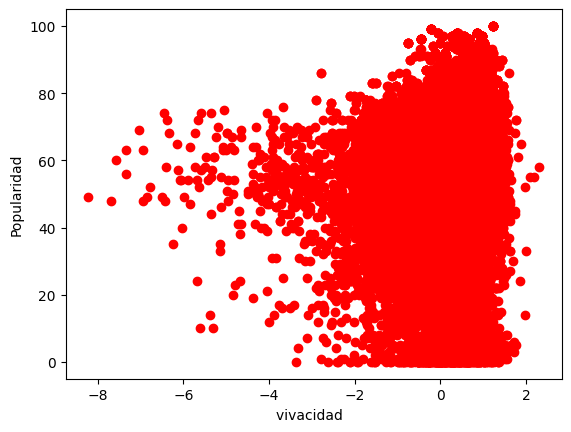

In [40]:
xlabel1 = "duración"
xlabel2 = "acústica"
xlabel3 = "bailabilidad "
xlabel4 = "energia"
xlabel5 = "instrumentabilidad"
xlabel6 = "tono"
xlabel7 = "vivacidad  "

ylabel1 = "Popularidad"

graficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)
graficarDatos(X_norm[:, 2], y, xlabel3, ylabel1)
graficarDatos(X_norm[:, 3], y, xlabel4, ylabel1)
graficarDatos(X_norm[:, 4], y, xlabel5, ylabel1)
graficarDatos(X_norm[:, 5], y, xlabel6, ylabel1)
graficarDatos(X_norm[:, 6], y, xlabel7, ylabel1)




# <a id="section2"></a>
### 1.4 Descenso por el gradiente

Primero agregamos unos a la matriz de X

<a id="section2"></a>
#### 1.4.1 Cálculo del costo $J(\theta)$

In [41]:
# No olvidarse agregar unos a la matriz de x

X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

#Imprimimos X_ready
print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}'.format(
    'X_ready[:,0]', '  X_ready[:, 1]', '  X_ready[:, 2]', '  X_ready[:, 3]', '  X_ready[:, 4]', '  X_ready[:, 5]', '  X_ready[:, 6]', '  X_ready[:, 7]'
))
print('-' * 292)

for i in range(10):
    print('{:10.0f}{:17.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7]
    ))

X_ready[:,0]  X_ready[:, 1]  X_ready[:, 2]  X_ready[:, 3]  X_ready[:, 4]  X_ready[:, 5]  X_ready[:, 6]  X_ready[:, 7]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
         1          -0.3972         1.1305        -1.9342        -1.7864        -0.1933         0.0218        -1.7170
         1           0.8444        -0.8280         1.1857         0.5322        -0.3513        -0.8184         0.8746
         1          -0.2423        -0.7053        -0.4445         0.3218        -0.3513        -0.1715         0.6457
         1          -2.2384         2.3089         0.2140        -2.0389         3.8794        -0.3855        -1.5585
         1           0.3842        -0.8956        -1.8703         1.2474        -0.3513         0.2496         0.5202

In [42]:
#Creamos la funcion de calcular costo
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  #h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$. 

In [43]:
theta=np.array([0.2, 3.0, 0.2,0.1, 3.0, 0.2,1.1, 2.0])
theta1=np.array([0.1, 2.0, 0.5,0.2, 8.0, 0.7,1.3, 8.0])

print(theta.shape[0])
# theta1=np.array([0.5, 7.0, 0.2])

print(f"########################################################################################################")
print(f"con theta:{ theta } se obtiene un costo de: {calcularCosto(X_ready, y, theta)}")
print(f"########################################################################################################")
print(f"con theta:{ theta1 } se obtiene un costo de: {calcularCosto(X_ready, y, theta1)}")

8
########################################################################################################
con theta:[0.2 3.  0.2 0.1 3.  0.2 1.1 2. ] se obtiene un costo de: 1652.0743643267288
########################################################################################################
con theta:[0.1 2.  0.5 0.2 8.  0.7 1.3 8. ] se obtiene un costo de: 1740.7260931830021


<a id="section3"></a>
#### 1.4.2 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso. 

Creamos la funcion para calcular el descenso por la gradiente y obtener un theta y J_historico.

In [45]:
#Creamos la funcion para calcular el descenso por Gradiente
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [47]:
#creamos un theta con 19 columnas de ceros
theta = np.zeros(8)

#numero de iteraciones sera 1000000 y un alpha 0.00009
num_ite = 1000000
alpha = 0.00009

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")

    
print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")

# print("Grafica la convergencia del costo")
# Grafica de la convergencia del costo




########################################################################################################
Los valores de theta calculados son:
theta 1: 53.0609901778209
theta 2: -0.13293601612689876
theta 3: -1.534039759677166
theta 4: 1.3106021340312846
theta 5: -3.8712114462214853
theta 6: -1.9785526965680424
theta 7: -0.6795781968752502
theta 8: 3.3522405891207936
########################################################################################################
con un costo de: 230.22875442518787 


Se utilizan los parametros finales para grafical la linea.

### 1.5 Grafica de la convergencia del costo
graficamos el costo

Text(0, 0.5, 'Costo J')

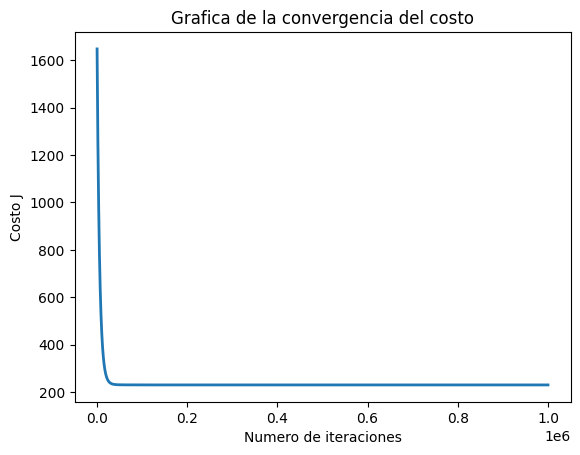

In [51]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

#### 1.5.1 Grafica de la regresion lineal

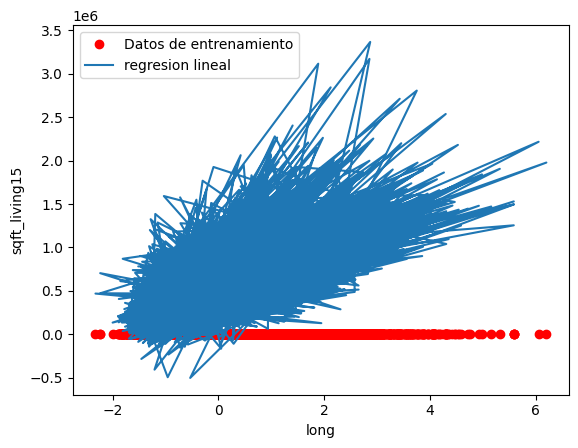

In [72]:
graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel1, xlabel2)

pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

### 1.6 Ejemplos de Predicciones


Se creo una matriz con 11 ejemplos, donde se hace las predicciones correpondientes:

In [73]:
#Creamos la matriz con 11 ejemplos para hacer la prueba predecir un precio de cada ejemplo:
matriz_datos = np.array([
    [1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650],
    [1,2,0.75,1020,1076,2,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357],
    [1,4,2.75,3555,6565,2,0,0,3,9,3555,0,2014,0,98053,47.6847,-122.017,3625,5637],
    [1,2,1,1040,13920,1,0,0,3,6,1040,0,1973,1867,98198,47.3756,-122.306,1100,7575],
    [1,4,1.75,1860,7350,1,0,0,4,7,1090,770,1977,1900,98031,47.3979,-122.174,1710,7350],
    [1,1,1,1060,54846,1,1,4,3,5,1060,0,1935,0,98070,47.4716,-122.445,2258,31762],
    [1,4,1.5,2220,9496,1,0,0,4,7,1490,730,1954,0,98004,47.6233,-122.206,1800,8286],
    [1,4,1.5,1560,6534,1,0,0,4,7,1560,0,1962,0,98007,47.6012,-122.152,1560,6969],
    [1,5,3,2510,4125,1.5,0,3,5,8,1590,920,1925,0,98144,47.5968,-122.29,2190,5415],
    [1,3,2.5,1680,2096,2,0,0,3,8,1380,300,2008,0,98117,47.6904,-122.37,1360,2096],
    [1,3,2.25,2020,3600,2,0,0,3,8,2020,0,1998,0,98033,47.6678,-122.165,2070,3699]
])

#creamos un vector parta almacenar cada Y predicha
y_pre = []
matriz_datos_copy = matriz_datos.copy()

#Normalizamos todos, menos el primer valor de cada ejemplo
for datos in matriz_datos:
    datos[1:] = (datos[1:] - mu) / sigma
    

#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos:
    y_pre.append(np.dot(datos, theta))

matriz_datos_copy = np.column_stack((matriz_datos_copy, y_pre))

nombres_columnas = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','Price']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_copy.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))


+----+------------+-------------+---------------+------------+----------+--------------+--------+-------------+---------+--------------+-----------------+------------+----------------+-----------+---------+----------+-----------------+--------------+----------+
|    |   bedrooms |   bathrooms |   sqft_living |   sqft_lot |   floors |   waterfront |   view |   condition |   grade |   sqft_above |   sqft_basement |   yr_built |   yr_renovated |   zipcode |     lat |     long |   sqft_living15 |   sqft_lot15 |    Price |
+====+============+=============+===============+============+==========+==============+========+=============+=========+==============+=================+============+================+===========+=========+==========+=================+==============+==========+
|  1 |          3 |        1    |          1180 |       5650 |      1   |            0 |      0 |           3 |       7 |         1180 |               0 |       1955 |              0 |     98178 | 47.5112 | -122.25

### 1.7 Validaciones
Para hacer las validaciones correspondientes, primero se crea la funcion del **Mean squeared error**

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

#### 1.7.1 Creacion de la funcion del error cuadratico medio

In [76]:
#Creamos la funcion:
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta ** 2)
    return err_cuadrado / len(y_pre) 


#### 1.7.2 haciendo calculo del error cuadratico medio

In [79]:
#haciendo x_test que es el 20% restante
m_ready = len(y_test)

#Concatenamos de unos a la primera posicion del X_test
X_ready_test = np.concatenate([np.ones((m_ready, 1)), X_test], axis=1)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
for datos_test in X_ready_test:
    datos_test[1:] = (datos_test[1:] - mu) / sigma

#creamos un array que almacenara cada una de las y_predicha
y_predicha = []
for data_test_ready in X_ready_test:
    y_predicha.append(np.dot(data_test_ready, theta))

#calculamos el error cuadratico medio:
error_cua = mean_squared_error(y_predicha, y_test)
print('Valor del error cuadratico medio es:', error_cua)

Valor del error cuadratico medio es: 17753007128538.277


## 2. Regresion polinomica

## 3. Ecuacion de la normal

Hacemos uso de la funcion de la Normal, haremos uso de los datos cargados en X para garantizar que las variables no esten modificadas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección

In [145]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),y)
    
    return theta

### 3.1 Agregando la columna de unos a la matriz $X$ para tener el termino de intersección

In [146]:
# Cargamos los datos utilizando pandasd
data = pd.read_csv('kc_house_data.csv', delimiter=',')

#retiramos el id y la fecha del las columnas, quitamos el precio ya que ira a el vector Y, tambien quitamos los titulos
dataset = data.drop(['id', 'date'], axis=1).astype(float)

# Seleccionar aleatoriamente 20,000 ejemplos
sampled_dataset = dataset.sample(n=20000, random_state=42)

train_dataset, test_dataset = train_test_split(sampled_dataset, test_size=0.2, random_state=42)

X_test = test_dataset.drop(['price'], axis=1).values
y_test = test_dataset['price'].values

# Seleccionamos las columnas para X y la columna 'price' para y
X = train_dataset.drop(['price'], axis=1).values
y = train_dataset['price'].values
m = len(y)
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

#Imprimimos X_ready
print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_ren[:,0]', '  X_ren[:, 1]', '  X_ren[:, 2]', '  X_ren[:, 3]', '  X_ren[:, 4]', '  X_ren[:, 5]', '  X_ren[:, 6]', '  X_ren[:, 7]', '  X_ren[:, 8]', '  X_ren[:, 9]', '  X_ren[:, 10]', '  X_ren[:, 11]',
    '  X_ren[:, 12]', '  X_ren[:, 13]', '  X_ren[:, 14]', '  X_ren[:, 15]', '  X_ren[:, 16]', '  X_ren[:, 17]', '  X_ren[:, 18]'
))
print('-' * 260)

for i in range(10):
    print('{:10.0f}{:12.0f}{:12.0f}{:15.0f}{:14.0f}{:12.0f}{:13.0f}{:14.0f}{:12.0f}{:14.0f}{:13.0f}{:14.0f}{:13.0f}{:14.0f}{:15.0f}{:13.0f}{:14.0f}{:15.0f}{:14.0f}'.format(
        X_ren[i, 0], X_ren[i, 1], X_ren[i, 2], X_ren[i, 3], X_ren[i, 4], X_ren[i, 5], X_ren[i, 6], X_ren[i, 7], X_ren[i, 8], X_ren[i, 9], X_ren[i, 10], X_ren[i, 11],
        X_ren[i, 12], X_ren[i, 13], X_ren[i, 14], X_ren[i, 15], X_ren[i, 16], X_ren[i, 17], X_ren[i, 18]
    ))

X_ren[:,0]  X_ren[:, 1]  X_ren[:, 2]  X_ren[:, 3]  X_ren[:, 4]  X_ren[:, 5]  X_ren[:, 6]  X_ren[:, 7]  X_ren[:, 8]  X_ren[:, 9]  X_ren[:, 10]  X_ren[:, 11]  X_ren[:, 12]  X_ren[:, 13]  X_ren[:, 14]  X_ren[:, 15]  X_ren[:, 16]  X_ren[:, 17]  X_ren[:, 18]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
         1           2           2           1390          6670           1            0             0           3             6          720           670         1941             0          98115           48          -122            920          6380
         1           3           3           2540          8604           2            0             0           3             8         2540             0         1991             0          98092           47          -122       

## 3.2 Calculando Theta

In [147]:
# Calculamos thea haciendo uso de la funcion
theta2 = calcularThethaEcuacionNormal(X_ren, y);

print(f"########################################################################################################")

print("Los valores de theta usando la ecuacion de la normal es calculados son:")
i = 0
for tht2 in theta2:
    i += 1
    print(f"theta {i}: {tht2}")
print(f"########################################################################################################")

########################################################################################################
Los valores de theta usando la ecuacion de la normal es calculados son:
theta 1: 15550765.562788932
theta 2: -3336164.915750435
theta 3: -384208.4392969166
theta 4: 38293.39210539675
theta 5: 0.2649409555920973
theta 6: 269602.53481336473
theta 7: 1540664.1240256045
theta 8: -25775.18209456873
theta 9: 14609.543056991997
theta 10: 149134.68604321865
theta 11: -37727.46992693181
theta 12: -37623.77740831107
theta 13: -2556.2520189300158
theta 14: 18.57716656465609
theta 15: -567.0177064511505
theta 16: 610567.276181861
theta 17: -215629.0738984424
theta 18: 27.76142619483184
theta 19: -0.3921443226667025
########################################################################################################


### 3.3 Ejemplos de Predicciones haciendo uso de la Ecuacion de la normal


Se creo una matriz con 11 ejemplos, donde se hace las predicciones correpondientes:

In [150]:
matriz_datos = np.array([
    [1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650],
    [1,2,0.75,1020,1076,2,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357],
    [1,4,2.75,3555,6565,2,0,0,3,9,3555,0,2014,0,98053,47.6847,-122.017,3625,5637],
    [1,2,1,1040,13920,1,0,0,3,6,1040,0,1973,2020,98198,47.3756,-122.306,1100,7575],
    [1,4,1.75,1860,7350,1,0,0,4,7,1090,770,1977,2000,98031,47.3979,-122.174,1710,7350],
    [1,1,1,1060,54846,1,1,4,3,5,1060,0,1935,0,98070,47.4716,-122.445,2258,31762],
    [1,4,1.5,2220,9496,1,0,0,4,7,1490,730,1954,0,98004,47.6233,-122.206,1800,8286],
    [1,4,1.5,1560,6534,1,0,0,4,7,1560,0,1962,0,98007,47.6012,-122.152,1560,6969],
    [1,5,3,2510,4125,1.5,0,3,5,8,1590,920,1925,0,98144,47.5968,-122.29,2190,5415],
    [1,3,2.5,1680,2096,2,0,0,3,8,1380,300,2008,0,98117,47.6904,-122.37,1360,2096],
    [1,3,2.25,2020,3600,2,0,0,3,8,2020,0,1998,0,98033,47.6678,-122.165,2070,3699]
])

#creamos un vector parta almacenar cada Y predicha
y_pre = []

#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos:
    y_pre.append(np.dot(datos, theta2).astype(int))

matriz_datos = np.column_stack((matriz_datos, y_pre))

nombres_columnas = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','Price']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))



+----+------------+-------------+---------------+------------+----------+--------------+--------+-------------+---------+--------------+-----------------+------------+----------------+-----------+---------+----------+-----------------+--------------+-------------------+
|    |   bedrooms |   bathrooms |   sqft_living |   sqft_lot |   floors |   waterfront |   view |   condition |   grade |   sqft_above |   sqft_basement |   yr_built |   yr_renovated |   zipcode |     lat |     long |   sqft_living15 |   sqft_lot15 |             Price |
+====+============+=============+===============+============+==========+==============+========+=============+=========+==============+=================+============+================+===========+=========+==========+=================+==============+===================+
|  1 |          3 |        1    |          1180 |       5650 |      1   |            0 |      0 |           3 |       7 |         1180 |               0 |       1955 |              0 |   

### 3.4 Validaciones
Para hacer las validaciones correspondientes, primero se crea la funcion del **Mean squeared error**

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

In [153]:
m_ready = len(y_test)

#Concatenamos de unos a la primera posicion del X_test
X_ready_test = np.concatenate([np.ones((m_ready, 1)), X_test], axis=1)

#creamos un array que almacenara cada una de las y_predicha
y_predicha = []
for data_test_ready in X_ready_test:
    y_predicha.append(np.dot(data_test_ready, theta2))

#calculamos el error cuadratico medio:
error_cua = mean_squared_error(y_predicha, y_test)
print('Valor del error cuadratico medio es:', error_cua)

Valor del error cuadratico medio es: 3146414104411215.5
